<center>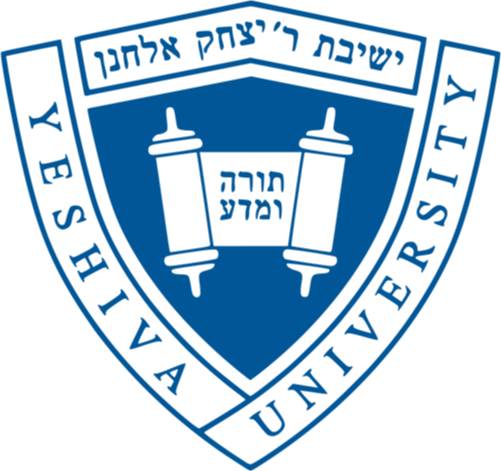</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5005 Machine Learning</h1>
<p>
<h2 style='text-align: center;'>Homework 07</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# 1. Implement K-means clustering methods (40 points)

In [14]:
# Load packages
import numpy as np
from scipy.io import loadmat
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def k_means(X, K, max_iters = 100, stopping_criteria = False):
    # m : number of samples
    # n : number of features
    m, n = X.shape

    # Cost function
    J_history = []

    # Initialize centroids randomly chosen from data points
    np.random.seed(50)
    centroids = X[np.random.choice(m, K, replace = False)]

    # Calculate distances (Euclidean) between each sample and each centroid
    distances = np.linalg.norm(X - centroids[:, None], axis = 2)

    # Lable each sample to the closest centroid
    old_labels = np.argmin(distances, axis = 0)

    for i, v in enumerate(range(max_iters)):

        # Update centroids to the mean of the samples in each cluster
        for j in range(K):
            centroids[j] = X[old_labels == j].mean(axis = 0)

        # Calculate the cost function
        distances = np.linalg.norm(X - centroids[:, None], axis = 2)
        labels = np.argmin(distances, axis = 0)

        # Calculate the objective function
        J = np.linalg.norm(X - centroids[labels])

        # Save the result of the objective function to history
        if ~np.isnan(J):
            J_history.append(J)

        if stopping_criteria:
            # If the new and old labels are the same, then terminate the algorithm
            lables_same = True
            for i in range(0, len(labels)):
                lables_same = lables_same and (labels[i] == old_labels[i])
            
            if lables_same:
                # print(f"Iterations = {i + 1}")
                break

        old_labels = labels
        # print(f"Iterations = {i + 1}")

    return centroids, labels[:, None], J_history

# 2. Load data.mat and then perform K-means of x, show the intermediate figures, e.g., iteration = 100, 200, 300, ... (40 points)

#### __Loading data__

In [3]:
data = loadmat("./data/data.mat")
X = data['x']
y = data['labels']

#### __Selection of K__

In [4]:
K_history = []

for k in range(1, 100 + 1):
    _, _, k_history = k_means(X, k)
    K_history.append(k_history[-1])

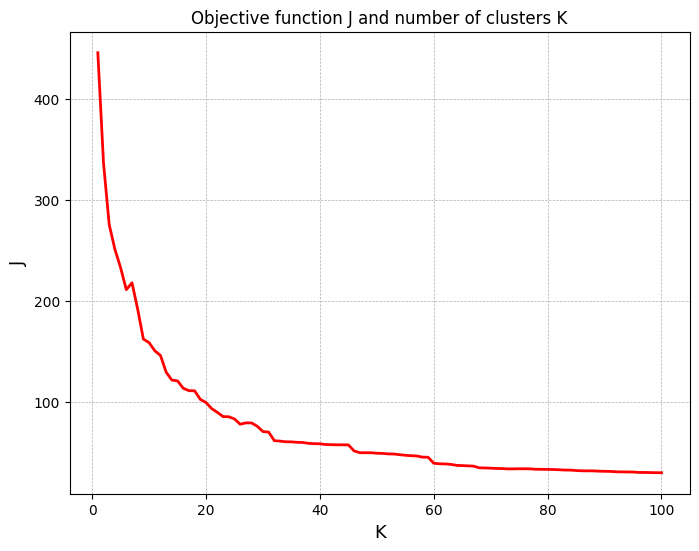

In [5]:
plt.figure(figsize = (8, 6))
plt.plot(np.arange(1, len(K_history) + 1), K_history, 'r-', linewidth = 2.0)
plt.title(r"Objective function J and number of clusters K")
plt.xlabel('K', fontsize = 13)
plt.ylabel('J', fontsize = 13)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

#### __Based on the knee finding of the objective function presented here, I chose K equal to 31.__

In [8]:
# Define number of clusters and maximum number of iterations
K = 31
max_iters = 400

#### __2D Plot  of the data and centroids__

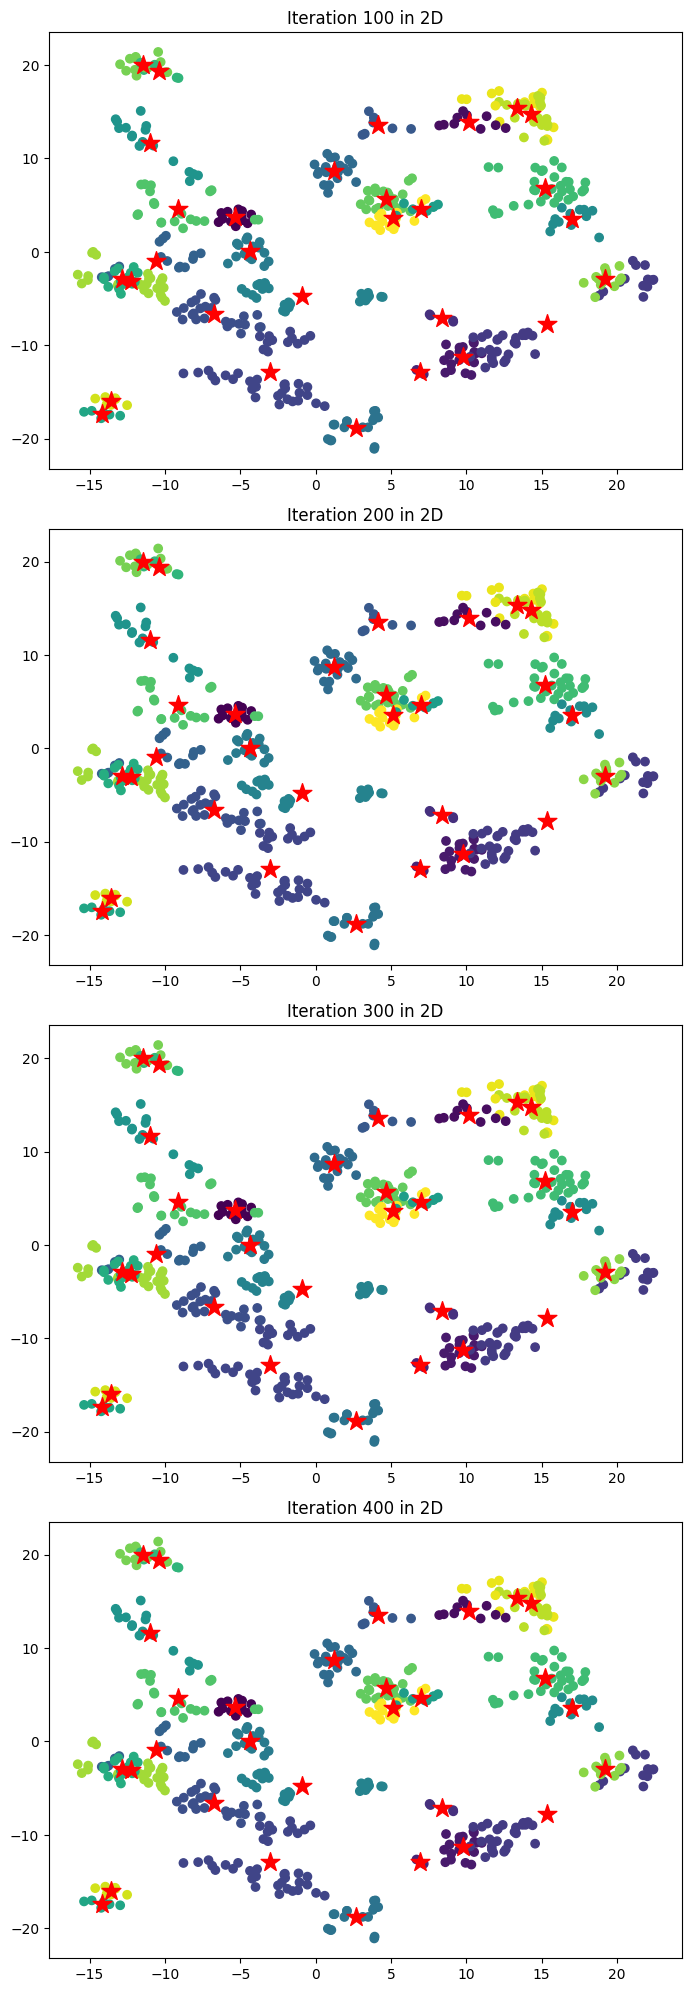

In [7]:
# figure size
plt.figure(figsize = (7, 20))

# Plot intermediate results every 100 iterations
for idx, iter in enumerate(range(100, max_iters + 1, 100)):

    centroids, labels, _ = k_means(X, K, iter)

    plt.subplot(4, 1, idx + 1)
    plt.scatter(X[:, 0], X[:, 1], c = labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
    plt.title(f'Iteration {iter} in 2D')
    plt.tight_layout(pad = 1.0)

plt.show()

#### __3D Plot  of the data and centroids__

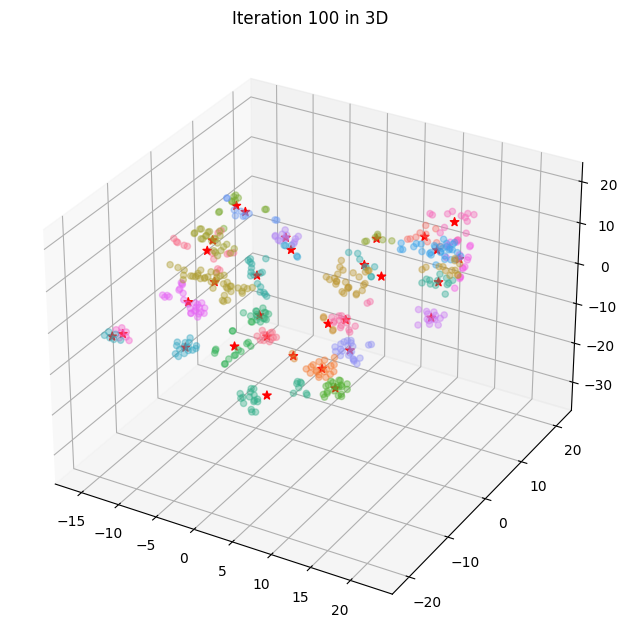

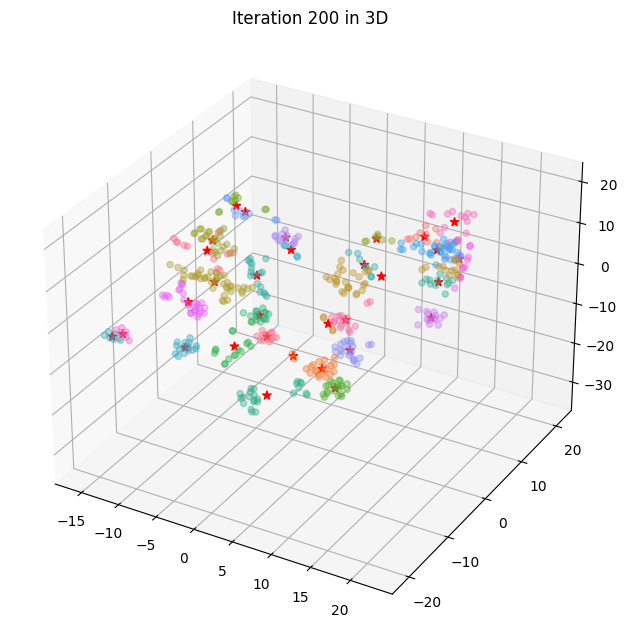

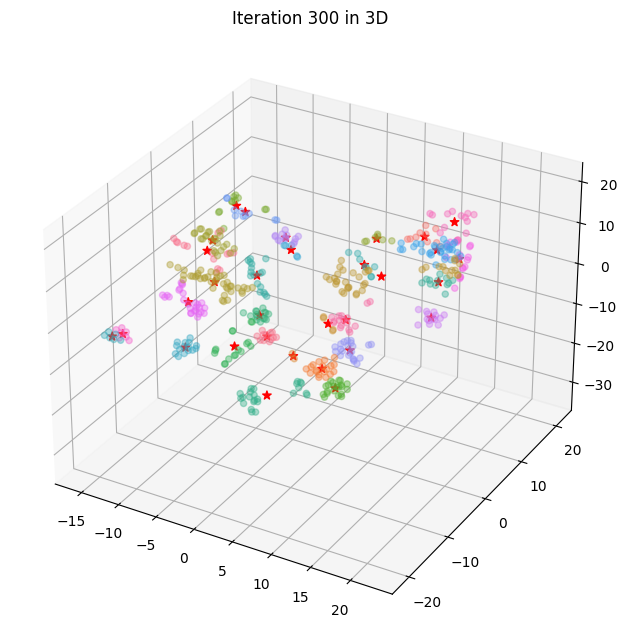

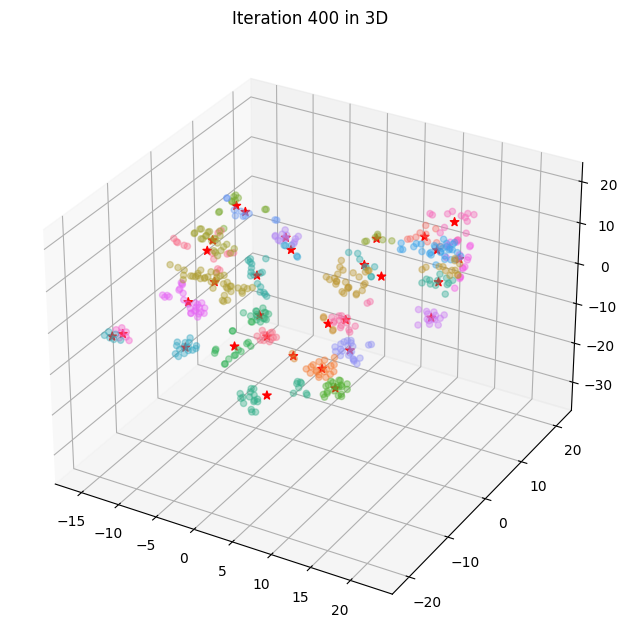

In [19]:
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# Plot intermediate results every 100 iterations
for idx, iter in enumerate(range(100, max_iters + 1, 100)):

    # temp = df[df['label']==i]
    centroids, labels, _ = k_means(X, K, iter)

    fig = plt.figure(figsize = (6, 6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)

    # plot
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = labels, marker = 'o', cmap = cmap, alpha = 0.4)
    sc = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s = 40, c = 'red', marker='*', alpha=1)

    plt.title(f'Iteration {iter} in 3D')

    plt.show ()

# 3. Calculate the accuracy using labels (20 points)

In [18]:
def accuracy(y, y_hat): # please check whether the dimensions are the same

    if type(y_hat) != np.ndarray:
        y_hat = np.array(y_hat).reshape(y.shape)

    if y.shape != y_hat.shape:
        raise ValueError("Dimensions do NOT match!")
    

    # Compute the contingency table/matrix
    contingency_matrix = np.zeros((np.unique(y).size, np.unique(y_hat).size))
    for i, j in zip(y, y_hat):
        contingency_matrix[i, j] += 1

    # Compute the accuracy
    matching = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    accuracy = contingency_matrix[matching[0], matching[1]].sum() / contingency_matrix.sum()
    
    return accuracy

In [19]:
y = y - 1 # The labels will start from 0 as the y_hat
y_hat = labels

In [20]:
my_acc = accuracy(y, y_hat)
print(f"Accuray : {my_acc * 100:.2f} %")

Accuray : 76.10 %


# References

- numpy.random.choice : https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.choice.html

- Evaluation Metrics Clustering : https://saltfarmer.github.io/blog/machine%20learning/Evaluation-Metrics-Clustering/

- scipy.optimize.linear_sum_assignment : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html

- Python Clustering 'purity' metric : https://stackoverflow.com/questions/34047540/python-clustering-purity-metric